# Importing Libraries

In [1]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np 
import random
import pydot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Conv3D, Reshape, Activation, Dropout, Flatten
from tensorflow.config.experimental import set_memory_growth, get_visible_devices
from tensorflow.keras.utils import plot_model

# GPU Configuration
(You can skip this part. It will not cause issues even if you do not have a CUDA enabled GPU.)

In [2]:
gpus=get_visible_devices('GPU')
for gpu in gpus:
    set_memory_growth(gpu, True)

# Defining general model variables

In [3]:
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = False

# Dataset

## Import

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Preprocessing

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Analysis

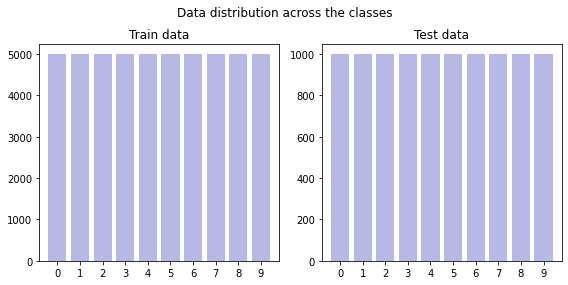

In [7]:
n1=np.sum(y_test,axis=0)
n2=np.sum(y_train, axis=0)
c=np.arange(0,n1.shape[0])
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(122)
ax1.bar(c,n1,color="#b8b8e5")
ax1.set_xticks(c)
ax1.set_xlim((-0.8,n1.shape[0]-0.2))
ax1.set_title("Test data")
ax2=fig.add_subplot(121)
ax2.bar(c,n2,color="#b8b8e5")
ax2.set_xticks(c)
ax2.set_xlim((-0.8,n2.shape[0]-0.2))
ax2.set_title("Train data")
plt.tight_layout()
fig.suptitle("Data distribution across the classes")
fig.subplots_adjust(top=0.85)
plt.savefig('resources/data_analysis.png',dpi=300)
plt.show()

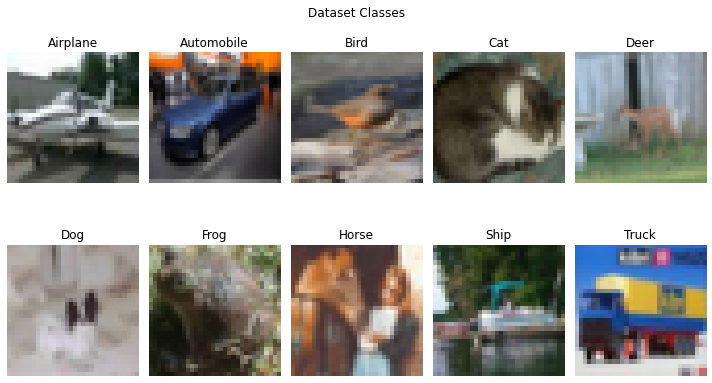

In [8]:
fig=plt.figure(figsize=(10,6))
name=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
for i in range(10):
    ax=fig.add_subplot(2,5,i+1)
    ax.axis('off')
    temp=random.randint(0,x_train[y_train[:,i]==1].shape[0]-1)
    ax.imshow(np.uint8(255*(x_train[y_train[:,i]==1][temp].reshape((32,32,3)))),cmap='gray')
    ax.set_title(name[i])
fig.suptitle("Dataset Classes")
plt.tight_layout()
plt.savefig("resources/dataclass.png",dpi=300)
plt.show()

# Model definition

## Normal Model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
plot_model(model, "resources/2d.png", show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

## New Approach

In [12]:
model1 = Sequential()
model1.add(Conv3D(32, 3,
                 input_shape=(32,32,3,1)))
model1.add(Reshape((30,30,32)))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [13]:
opt1 = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [14]:
model1.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

plot_model(model1, "resources/3d.png", show_shapes=True)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 30, 30, 1, 32)     896       
_________________________________________________________________
reshape (Reshape)            (None, 30, 30, 32)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)       

# Training

## General model

In [15]:
x_train=x_train.reshape((-1,32,32,3))
x_test=x_test.reshape((-1,32,32,3))
if not data_augmentation:
    print('Not using data augmentation.')
    h=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)
    datagen.fit(x_train)
    h=model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),)
h=h.history

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7989 - accuracy: 0.3418 - val_loss: 1.5085 - val_accuracy: 0.4551
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4992 - accuracy: 0.4588 - val_loss: 1.3968 - val_accuracy: 0.5002
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3626 - accuracy: 0.5118 - val_loss: 1.3336 - val_accuracy: 0.5330
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2615 - accuracy: 0.5527 - val_loss: 1.2271 - val_accuracy: 0.5736
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1805 - accuracy: 0.5826 - val_loss: 1.1042 - val_accuracy: 0.6142
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1100 - accuracy: 0.6143 - val_loss: 1.0509 - val_accuracy: 0.6259
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0569 - accuracy: 0.6300 - val

## Modified model

In [16]:
x_train=x_train.reshape((-1,32,32,3,1))
x_test=x_test.reshape((-1,32,32,3,1))
if not data_augmentation:
    print('Not using data augmentation.')
    h1=model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)
    datagen.fit(x_train)
    h1=model1.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),)
h1=h1.history

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8694 - accuracy: 0.3159 - val_loss: 1.5797 - val_accuracy: 0.4295
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5595 - accuracy: 0.4335 - val_loss: 1.4087 - val_accuracy: 0.4918
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4127 - accuracy: 0.4931 - val_loss: 1.3496 - val_accuracy: 0.5166
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3075 - accuracy: 0.5374 - val_loss: 1.1980 - val_accuracy: 0.5730
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2184 - accuracy: 0.5702 - val_loss: 1.1293 - val_accuracy: 0.6021
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1337 - accuracy: 0.6006 - val_loss: 1.0813 - val_accuracy: 0.6235
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0729 - accuracy: 0.6235 - v

# Model Metrics

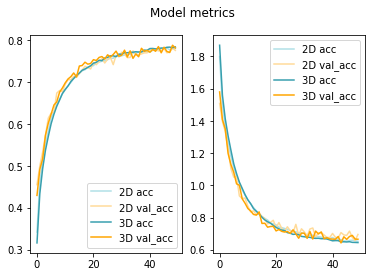

In [17]:
fig=plt.figure()
tra=fig.add_subplot(121)
tra.plot(h["accuracy"], label="2D acc", color="#B0E0E6")
tra.plot(h["val_accuracy"], label="2D val_acc", color="#FFDB99")
tra.plot(h1["accuracy"], label="3D acc", color="#379FAE")
tra.plot(h1["val_accuracy"], label="3D val_acc", color="#FFA500")
tra.legend()
tra1=fig.add_subplot(122)
tra1.plot(h["loss"], label="2D acc", color="#B0E0E6")
tra1.plot(h["val_loss"], label="2D val_acc", color="#FFDB99")
tra1.plot(h1["loss"], label="3D acc", color="#379FAE")
tra1.plot(h1["val_loss"], label="3D val_acc", color="#FFA500")
tra1.legend()
fig.suptitle("Model metrics")
plt.savefig("resources/metrics.png",dpi=300)
plt.show()

# Saving model metrics

In [18]:
f=open("resources/2d.json","w")
json.dump(h,f)
f.close()

In [19]:
f=open("resources/3d.json","w")
json.dump(h1,f)
f.close()

# Saving Models

In [20]:
model.save("models/c2d.h5")

In [21]:
model1.save("models/c3d.h5")

# Loading model metrics

In [22]:
f=open("resources/2d.json","r")
h=json.load(f)
f.close()

In [23]:
f=open("resources/3d.json","r")
h1=json.load(f)
f.close()

# Scoring the models

In [24]:
scores = model.evaluate(x_test.reshape((-1,32,32,3)), y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.6952 - accuracy: 0.7761
Test loss: 0.6952122449874878
Test accuracy: 0.7760999798774719


In [25]:
scores = model1.evaluate(x_test.reshape((-1,32,32,3,1)), y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.6655 - accuracy: 0.7819
Test loss: 0.6654888391494751
Test accuracy: 0.7818999886512756
